## Задача 2. Сравнение методов классификации

Ершов Александр Сергеевич, гр. 22.М04-мм

Выполненные пункты задания:
- Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блакнот с анализом этих данных можно найти тут.
- Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
- Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
- Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
- Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- \* (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.
- \* (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

### Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
### \* (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.

In [1]:
import numpy as np

In [41]:
class myLogisticRegression:

  def __init__(self, lr=0.01, n_iters=100):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def set_params(self, **parameters):
    for parameter, value in parameters.items():
      setattr(self, parameter, value)
    return self

  def get_params(self, deep=True):
        return {"lr": self.lr, "n_iters": self.n_iters}

  def fit(self,X,y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)

      self.weights -= self.lr *dw
      self.bias -= self.lr * db 

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))

In [3]:
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

In [42]:
class mySVM:
    def __init__(self, iterations=100, lr=0.01, lambda_param=0.01):
        self.lambda_param = lambda_param
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
          setattr(self, parameter, value)
        return self

    def get_params(self, deep=True):
        return {"lr": self.lr, "lambda_param": self.lambda_param, "iterations": self.iterations}

    def initialize_parameters(self,X):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        
    def gradient_descent(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        for i, x in enumerate(X):
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambda_param * self.w
                db = 0
            else:
                dw = 2 * self.lambda_param * self.w - np.dot(x, y_[i])
                db = y_[i]
            self.update_parameters(dw,db)
        
    def update_parameters(self, dw, db):
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db
        
    def fit(self, X, y):
        self.initialize_parameters(X)
        for i in range(self.iterations):
            self.gradient_descent(X,y)       
            
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        label_signs = np.sign(output)
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

### Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блакнот с анализом этих данных можно найти тут.
### Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

In [9]:
import pandas as pd

heart_data = pd.read_csv("heart.csv")

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.


In [11]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропусков в данных нет.

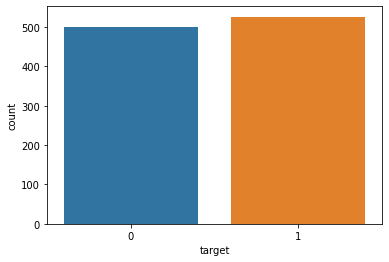

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(x = "target", data = sns.countplot)
plt.show()

В исходных данных число пациентов обоих полов схоже.

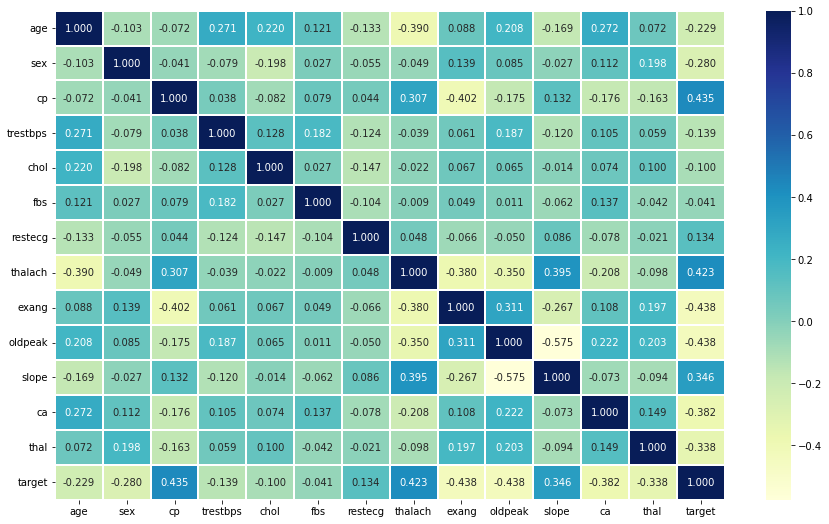

In [14]:
cor_matrix = heart_data.corr()
plt.figure(figsize = (15,9))
sns.heatmap(cor_matrix, 
           annot = True,
           linewidth = 1,
            fmt= ".3f", 
            cmap="YlGnBu"
           )

Признаков с высокой корреляцией для отбрасывания нет.

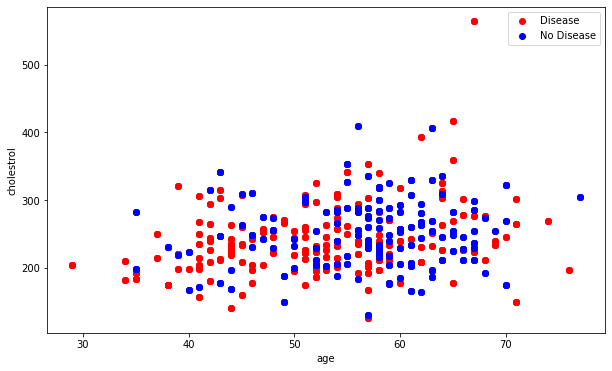

In [15]:
plt.figure(figsize = (10,6))

plt.scatter(heart_data.age[heart_data.target == 1],
           heart_data.chol[heart_data.target ==1], 
           color = "red")

plt.scatter(heart_data.age[heart_data.target==0],
           heart_data.chol[heart_data.target==0],
           color = "blue")

plt.xlabel("age")
plt.ylabel("cholestrol")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation = 0);

На диаграмме по вертикальной оси уровень холестирина, по горизонтальной - возраст, цвет точки обозначает наличие/отсутсвие заболевания.

### \* (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

Titanic - Machine Learning from Disaster
https://www.kaggle.com/competitions/titanic/data

In [63]:
titanic_data = pd.read_csv('train.csv')

In [64]:
titanic_data.shape

(891, 12)

In [65]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

В данных есть пропуски в признаках Age, Cabin, Embarked.

Статистика целевой переменной.

In [67]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [181]:
pd.crosstab(titanic_data.Pclass, titanic_data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Число выживших падает с понижением класса.

In [183]:
pd.crosstab([titanic_data.Sex, titanic_data.Survived], titanic_data.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

Почти все женщины в 1 и 2 классе выжили, при это почти все мужчины в 2 и 3 классе умерли.

Общая информация о числовых признаках.

In [68]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Кодирование категориальных признаков.

In [69]:
embark = pd.get_dummies(titanic_data['Embarked'])
gender = pd.get_dummies(titanic_data['Sex'])

Пропуски возраста заполняются средним значением 30.

In [70]:
titanic_data['Age'].fillna(30,inplace=True)
titanic_data['Age'] = titanic_data['Age'].astype('int')

Возраст разделен на 6 категорий.

In [71]:
def age_grp(age):
    if age<13:
        return '<13'
    elif (age>=13) &(age<18):
        return '13-18'
    elif (age>=18) &(age<=24):
        return '18-24'
    elif (age>=25) &(age<=34):
        return '25-34'
    elif (age>=35) &(age<=44):
        return '35-44'
    else:
        return '45+'

titanic_data['Age_grp'] = titanic_data['Age'].apply(lambda x: age_grp(x))
age = pd.get_dummies(titanic_data['Age_grp'])

In [72]:
titanic_data = pd.concat([titanic_data,embark,gender,age],axis=1)
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_grp', 'C', 'Q',
       'S', 'female', 'male', '13-18', '18-24', '25-34', '35-44', '45+',
       '<13'],
      dtype='object')

In [73]:
def is_var(val):
    if val>0:
        return 1
    else:
        return 0

Добавление нового признака - Family - количество членов одной семьи на Титанике.

In [74]:
titanic_data['Family'] = titanic_data['Parch'] + 1 + titanic_data['SibSp']
titanic_data['Parch'] = titanic_data['Parch'].apply(lambda x: is_var(x))
titanic_data['SibSp'] = titanic_data['SibSp'].apply(lambda x: is_var(x))

In [75]:
sel_cols=['Fare', 
    'Pclass', 'SibSp',
       'Parch',  'C', 'Q',
       'S', 'female', 'male', '18-24', '25-34', '35-44', '45+', '<13','13-18', 'Family'
]

titanic_data.fillna(0,inplace=True)

titanic_data_X = titanic_data[sel_cols]
titanic_data_y = titanic_data['Survived']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

titanic_train_X, titanic_test_X, titanic_train_y, titanic_test_y = train_test_split(titanic_data_X, titanic_data_y, test_size = 0.3, random_state=19)

# Scaling with Standard Scaler
scaler = StandardScaler() 
titanic_train_X_scaled = scaler.fit_transform(titanic_train_X)
titanic_test_X_scaled = scaler.transform(titanic_test_X)

### При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

Преобразование категориальных признаков cp, thal, slope.

In [29]:
cp_dum = pd.get_dummies(heart_data['cp'], prefix = "cp")
thal_dum = pd.get_dummies(heart_data['thal'], prefix = "thal")
slope_dum = pd.get_dummies(heart_data['slope'], prefix = "slope")

frames = [heart_data, cp_dum, thal_dum, slope_dum]
heart = pd.concat(frames, axis = 1)

heart_data = heart_data.drop(columns = ['cp', 'thal', 'slope'])
heart_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target
0,52,1,125,212,0,1,168,0,1.0,2,0
1,53,1,140,203,1,0,155,1,3.1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0
3,61,1,148,203,0,1,161,0,0.0,1,0
4,62,0,138,294,1,1,106,0,1.9,3,0


Признаков, которые можно убрать, по результатам EDA нет.

### Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

#### Датасет heart.csv

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

heart_data_X = heart_data.drop(columns=['target'])
heart_data_y = heart_data['target']

heart_train_X, heart_test_X, heart_train_y, heart_test_y = train_test_split(heart_data_X, heart_data_y, test_size = 0.3, random_state=19)

# Scaling with Standard Scaler
scaler = StandardScaler() 
heart_train_X_scaled = scaler.fit_transform(heart_train_X)
heart_test_X_scaled = scaler.transform(heart_test_X)

Logistic Regression

In [43]:
myLR_heart = myLogisticRegression()
myLR_heart.fit(heart_train_X_scaled, heart_train_y)

In [44]:
accuracies_heart = {}

In [45]:
predictions = myLR_heart.predict(heart_test_X_scaled)

acc = accuracy(heart_test_y, predictions)
accuracies_heart['myLR'] = acc
print("Accuracy {:.4f}".format(acc))

Accuracy 0.8182


Подбор гиперпараметров

In [46]:
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'lr' : np.logspace(-5,-1,5),
    'n_inters' : np.logspace(3,6,4)
}

Grid_myLR_heart = GridSearchCV(myLogisticRegression(), param_grid = parameters, scoring='accuracy')

In [47]:
Grid_myLR_heart.fit(heart_train_X_scaled, heart_train_y)

GridSearchCV(estimator=<__main__.myLogisticRegression object at 0x7fe5b864f950>,
             param_grid={'lr': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01]),
                         'n_inters': array([   1000.,   10000.,  100000., 1000000.])},
             scoring='accuracy')

In [48]:
Grid_myLR_heart.best_params_

{'lr': 0.01, 'n_inters': 1000.0}

In [49]:
predictions = Grid_myLR_heart.predict(heart_test_X_scaled)

acc = accuracy(heart_test_y, predictions)
accuracies_heart['myLR with hp tuning'] = acc
print("Accuracy {:.4f}".format(acc))

Accuracy 0.8182


Кросс-валидация

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Grid_myLR_heart, heart_train_X_scaled, heart_train_y, cv=5)

In [39]:
scores.mean()

0.8047688422688422

In [40]:
scores.std()

0.02594288250439572

SVM

In [50]:
mySVM_heart = mySVM()
mySVM_heart.fit(heart_train_X_scaled, heart_train_y)

In [51]:
predictions = mySVM_heart.predict(heart_test_X_scaled)

acc = accuracy(heart_test_y, predictions)
accuracies_heart['mySVM'] = acc
print("Accuracy {:.4f}".format(acc))

Accuracy 0.7825


Подбор гиперпараметров

In [52]:
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'lr' : [0.01, 0.001],
    'lambda_param' : [0.01, 0.001],
    'iterations' : [100, 500, 1000]
}

Grid_mySVM_heart = GridSearchCV(mySVM(), param_grid = parameters, scoring='accuracy')

In [55]:
Grid_mySVM_heart.fit(heart_train_X_scaled, heart_train_y)

GridSearchCV(estimator=<__main__.mySVM object at 0x7fe5b85d8110>,
             param_grid={'iterations': [100, 500, 1000],
                         'lambda_param': [0.01, 0.001], 'lr': [0.01, 0.001]},
             scoring='accuracy')

In [56]:
Grid_mySVM_heart.best_params_

{'iterations': 500, 'lambda_param': 0.01, 'lr': 0.01}

In [57]:
predictions = Grid_mySVM_heart.predict(heart_test_X_scaled)

acc = accuracy(heart_test_y, predictions)
accuracies_heart['mySVM with hp tuning'] = acc
print("Accuracy {:.4f}".format(acc))

Accuracy 0.7825


In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Grid_mySVM_heart, heart_train_X_scaled, heart_train_y, cv=5)

In [59]:
scores.mean()

0.8005924630924632

In [60]:
scores.std()

0.04228390379511601

#### Датасет titanic.csv

Logistic Regression

In [76]:
myLR_titanic = myLogisticRegression()
myLR_titanic.fit(titanic_train_X_scaled, titanic_train_y)

In [77]:
accuracies_titanic = {}

In [78]:
predictions = myLR_titanic.predict(titanic_test_X_scaled)

acc = accuracy(titanic_test_y, predictions)
accuracies_titanic['myLR'] = acc
print("Accuracy {:.4f}".format(acc))

Accuracy 0.8172


Подбор гиперпараметров

In [79]:
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'lr' : np.logspace(-5,-1,5),
    'n_inters' : np.logspace(3,6,4)
}

myLR_titanic = myLogisticRegression()
Grid_myLR_titanic = GridSearchCV(myLR_titanic, param_grid = parameters, scoring='accuracy')

In [80]:
Grid_myLR_titanic.fit(titanic_train_X_scaled, titanic_train_y)

GridSearchCV(estimator=<__main__.myLogisticRegression object at 0x7fe5b84ca9d0>,
             param_grid={'lr': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01]),
                         'n_inters': array([   1000.,   10000.,  100000., 1000000.])},
             scoring='accuracy')

In [81]:
Grid_myLR_titanic.best_params_

{'lr': 0.1, 'n_inters': 1000.0}

In [82]:
predictions = Grid_myLR_titanic.predict(titanic_test_X_scaled)

acc = accuracy(titanic_test_y, predictions)
accuracies_titanic['myLR with hp tuning'] = acc
print("Accuracy {:.4f}".format(acc))

Accuracy 0.8246


Кросс-валидация

In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Grid_myLR_titanic, titanic_train_X_scaled, titanic_train_y, cv=5)

In [84]:
scores.mean()

0.7801161290322581

In [85]:
scores.std()

0.05124264613111048

SVM

In [86]:
mySVM_titanic = mySVM()
mySVM_titanic.fit(titanic_train_X_scaled, titanic_train_y)

In [87]:
predictions = mySVM_titanic.predict(titanic_test_X_scaled)

acc = accuracy(titanic_test_y, predictions)
accuracies_titanic['mySVM'] = acc
print("Accuracy {:.4f}".format(acc))

Accuracy 0.8321


Подбор гиперпараметров

In [88]:
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'lr' : [0.01, 0.001],
    'lambda_param' : [0.01, 0.001],
    'iterations' : [100, 500, 1000]
}

Grid_mySVM_titanic = GridSearchCV(mySVM(), param_grid = parameters, scoring='accuracy')

In [89]:
Grid_mySVM_titanic.fit(titanic_train_X_scaled, titanic_train_y)

GridSearchCV(estimator=<__main__.mySVM object at 0x7fe5b851e350>,
             param_grid={'iterations': [100, 500, 1000],
                         'lambda_param': [0.01, 0.001], 'lr': [0.01, 0.001]},
             scoring='accuracy')

In [90]:
Grid_mySVM_titanic.best_params_

{'iterations': 1000, 'lambda_param': 0.001, 'lr': 0.01}

In [91]:
predictions = Grid_mySVM_titanic.predict(titanic_test_X_scaled)

acc = accuracy(titanic_test_y, predictions)
accuracies_titanic['mySVM with hp tuning'] = acc
print("Accuracy {:.4f}".format(acc))

Accuracy 0.8396


In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Grid_mySVM_heart, titanic_train_X_scaled, titanic_train_y, cv=5)

In [93]:
scores.mean()

0.7993548387096775

In [94]:
scores.std()

0.03250934389012632

### Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree)

#### Датасет heart.csv

logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression

logist_hp = {"C": np.logspace(-4, 4, 20),
            "solver": ["liblinear", "newton-cg","sag"]}

Grid_LR_heart = GridSearchCV(LogisticRegression(),
                      logist_hp,
                      cv = 5)

In [96]:
Grid_LR_heart.fit(heart_train_X_scaled, heart_train_y);

In [97]:
predictions = Grid_LR_heart.predict(heart_test_X_scaled)
print("Accuracy: ",accuracy(heart_test_y, predictions))

Accuracy:  0.8181818181818182


In [98]:
scores = cross_val_score(Grid_LR_heart, heart_train_X_scaled, heart_train_y, cv=5)

In [99]:
scores.mean()

0.8047494172494172

In [100]:
scores.std()

0.014530953263877596

#### svm

In [101]:
from sklearn.svm import SVC

SVM_hp = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
Grid_SVM_heart = GridSearchCV(SVC(),
                        SVM_hp,
                        cv = 5)

In [102]:
Grid_SVM_heart.fit(heart_train_X_scaled, heart_train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [103]:
predictions = Grid_SVM_heart.predict(heart_test_X_scaled)
print("Accuracy: ",accuracy(heart_test_y, predictions))

Accuracy:  0.9642857142857143


In [104]:
scores = cross_val_score(Grid_SVM_heart, heart_train_X_scaled, heart_train_y, cv=5)

In [105]:
scores.mean()

0.9469794094794095

In [106]:
scores.std()

0.021070693833209038

#### knn

In [107]:
from sklearn.neighbors import KNeighborsClassifier

KNN_hp = {'n_neighbors': list(range(1, 31))} 

Grid_KNN_heart = GridSearchCV(KNeighborsClassifier(),
                        KNN_hp,
                        cv = 5)

In [108]:
Grid_KNN_heart.fit(heart_train_X_scaled, heart_train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [109]:
predictions = Grid_KNN_heart.predict(heart_test_X_scaled)
print("Accuracy: ",accuracy(heart_test_y, predictions))

Accuracy:  0.9642857142857143


In [110]:
scores = cross_val_score(Grid_KNN_heart, heart_train_X_scaled, heart_train_y, cv=5)

In [111]:
scores.mean()

0.9525446775446775

In [112]:
scores.std()

0.02631495845770777

#### naive bayes

In [113]:
from sklearn.naive_bayes import GaussianNB
NB_hp = {'var_smoothing': np.logspace(0,-9, num=100)}
Grid_NB_heart = GridSearchCV(GaussianNB(),
                       NB_hp, 
                       cv=5) 

In [114]:
Grid_NB_heart.fit(heart_train_X_scaled, heart_train_y)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [115]:
predictions = Grid_NB_heart.predict(heart_test_X_scaled)
print("Accuracy: ",accuracy(heart_test_y, predictions))

Accuracy:  0.7987012987012987


In [116]:
scores = cross_val_score(Grid_NB_heart, heart_train_X_scaled, heart_train_y, cv=5)

In [117]:
scores.mean()

0.7991452991452992

In [118]:
scores.std()

0.0228618738773005

#### decision tree

In [119]:
from sklearn.tree import DecisionTreeClassifier
DT_hp = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

Grid_DT_heart = GridSearchCV(DecisionTreeClassifier(),
                       DT_hp, 
                       cv=5) 

In [120]:
Grid_DT_heart.fit(heart_train_X_scaled, heart_train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [121]:
predictions = Grid_DT_heart.predict(heart_test_X_scaled)
print("Accuracy: ",accuracy(heart_test_y, predictions))

Accuracy:  0.8668831168831169


In [122]:
scores = cross_val_score(Grid_DT_heart, heart_train_X_scaled, heart_train_y, cv=5)

In [123]:
scores.mean()

0.8703282828282827

In [124]:
scores.std()

0.033092423412310376

### Датасет titanic

#### logistic regression

In [125]:
from sklearn.linear_model import LogisticRegression

logist_hp = {"C": np.logspace(-4, 4, 20),
            "solver": ["liblinear", "newton-cg","sag"]}

Grid_LR_titanic = GridSearchCV(LogisticRegression(),
                      logist_hp,
                      cv = 5)

In [ ]:
Grid_LR_titanic.fit(titanic_train_X_scaled, titanic_train_y);

In [127]:
predictions = Grid_LR_titanic.predict(titanic_test_X_scaled)
print("Accuracy: ",accuracy(titanic_test_y, predictions))

Accuracy:  0.835820895522388


In [ ]:
scores = cross_val_score(Grid_LR_titanic, titanic_train_X_scaled, titanic_train_y, cv=5)

In [129]:
scores.mean()

0.7897290322580647

In [130]:
scores.std()

0.04717300767903137

#### svm

In [131]:
from sklearn.svm import SVC

SVM_hp = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
Grid_SVM_titanic = GridSearchCV(SVC(),
                        SVM_hp,
                        cv = 5)

In [132]:
Grid_SVM_titanic.fit(titanic_train_X_scaled, titanic_train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [133]:
predictions = Grid_SVM_titanic.predict(titanic_test_X_scaled)
print("Accuracy: ",accuracy(titanic_test_y, predictions))

Accuracy:  0.8395522388059702


In [134]:
scores = cross_val_score(Grid_SVM_titanic, titanic_train_X_scaled, titanic_train_y, cv=5)

In [135]:
scores.mean()

0.8154193548387096

In [136]:
scores.std()

0.03763510659874994

#### knn

In [137]:
from sklearn.neighbors import KNeighborsClassifier

KNN_hp = {'n_neighbors': list(range(1, 31))} 

Grid_KNN_titanic = GridSearchCV(KNeighborsClassifier(),
                        KNN_hp,
                        cv = 5)

In [138]:
Grid_KNN_titanic.fit(titanic_train_X_scaled, titanic_train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [139]:
predictions = Grid_KNN_titanic.predict(titanic_test_X_scaled)
print("Accuracy: ",accuracy(titanic_test_y, predictions))

Accuracy:  0.8432835820895522


In [141]:
scores = cross_val_score(Grid_KNN_titanic, titanic_train_X_scaled, titanic_train_y, cv=5)

In [142]:
scores.mean()

0.791341935483871

In [143]:
scores.std()

0.04883216217243471

#### naive bayes

In [144]:
from sklearn.naive_bayes import GaussianNB
NB_hp = {'var_smoothing': np.logspace(0,-9, num=100)}
Grid_NB_titanic = GridSearchCV(GaussianNB(),
                       NB_hp, 
                       cv=5) 

In [145]:
Grid_NB_titanic.fit(titanic_train_X_scaled, titanic_train_y)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [146]:
predictions = Grid_NB_titanic.predict(titanic_test_X_scaled)
print("Accuracy: ",accuracy(titanic_test_y, predictions))

Accuracy:  0.8171641791044776


In [147]:
scores = cross_val_score(Grid_NB_titanic, titanic_train_X_scaled, titanic_train_y, cv=5)

In [148]:
scores.mean()

0.7721161290322581

In [149]:
scores.std()

0.052127409747985166

#### decision tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
DT_hp = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

Grid_DT_titanic = GridSearchCV(DecisionTreeClassifier(),
                       DT_hp, 
                       cv=5) 

In [151]:
Grid_DT_titanic.fit(titanic_train_X_scaled, titanic_train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [152]:
predictions = Grid_DT_titanic.predict(titanic_test_X_scaled)
print("Accuracy: ",accuracy(titanic_test_y, predictions))

Accuracy:  0.8059701492537313


In [153]:
scores = cross_val_score(Grid_DT_titanic, titanic_train_X_scaled, titanic_train_y, cv=5)

In [154]:
scores.mean()

0.8058451612903225

In [155]:
scores.std()

0.0511414532587332

### Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных

#### Датасет heart.csv

In [177]:
from sklearn.metrics import confusion_matrix

# Predictions
y_pred_lr_heart = Grid_LR_heart.best_estimator_.predict(heart_test_X_scaled)
y_pred_knn_heart = Grid_KNN_heart.best_estimator_.predict(heart_test_X_scaled)
y_pred_svm_heart = Grid_SVM_heart.best_estimator_.predict(heart_test_X_scaled)
y_pred_nb_heart = Grid_NB_heart.best_estimator_.predict(heart_test_X_scaled)
y_pred_dt_heart = Grid_DT_heart.best_estimator_.predict(heart_test_X_scaled)

# Confusion Matrices
# TP FP
# FN TN
cm_lr_heart = confusion_matrix(heart_test_y, y_pred_lr_heart)
cm_knn_heart = confusion_matrix(heart_test_y, y_pred_knn_heart)
cm_svm_heart = confusion_matrix(heart_test_y, y_pred_svm_heart)
cm_nb_heart = confusion_matrix(heart_test_y, y_pred_nb_heart)
cm_dt_heart = confusion_matrix(heart_test_y, y_pred_dt_heart)

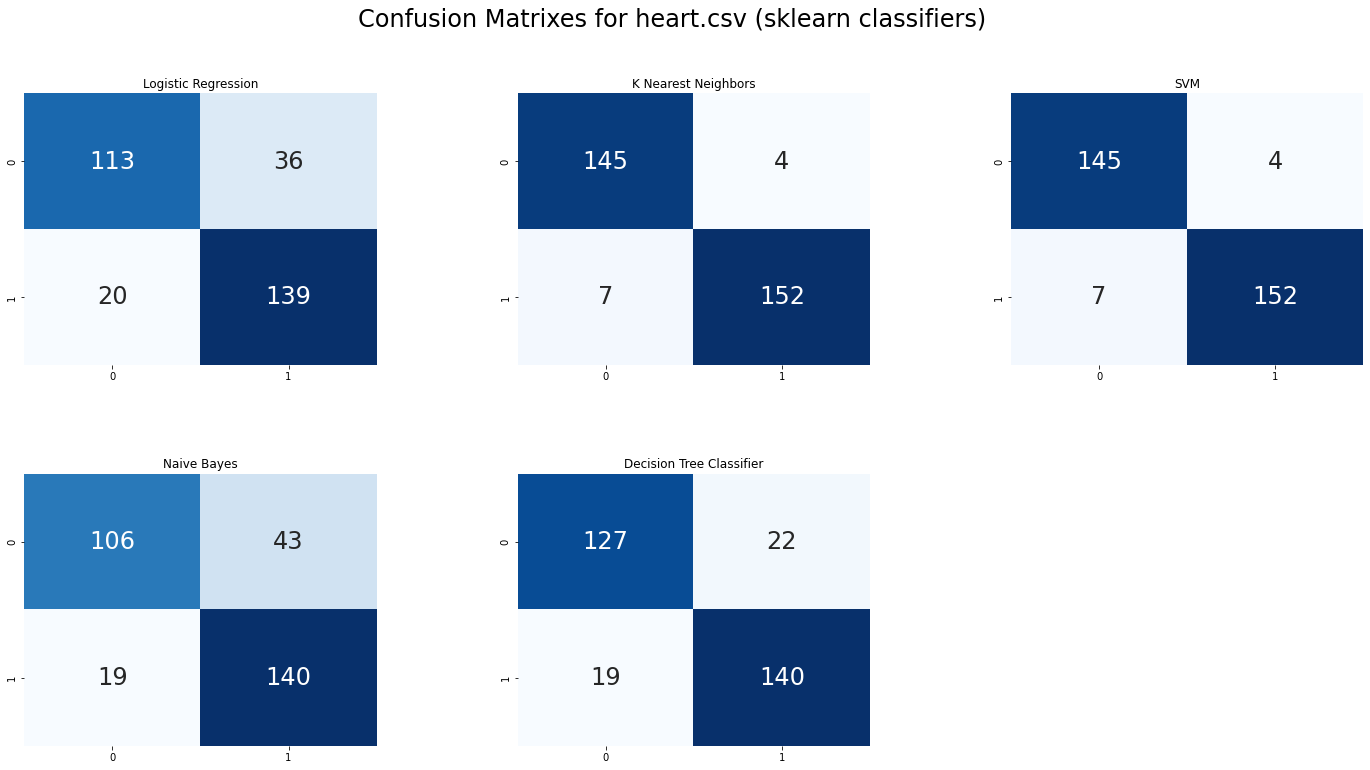

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes for heart.csv (sklearn classifiers)", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(cm_lr_heart,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors")
sns.heatmap(cm_knn_heart,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("SVM")
sns.heatmap(cm_svm_heart,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes")
sns.heatmap(cm_nb_heart,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier")
sns.heatmap(cm_dt_heart,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

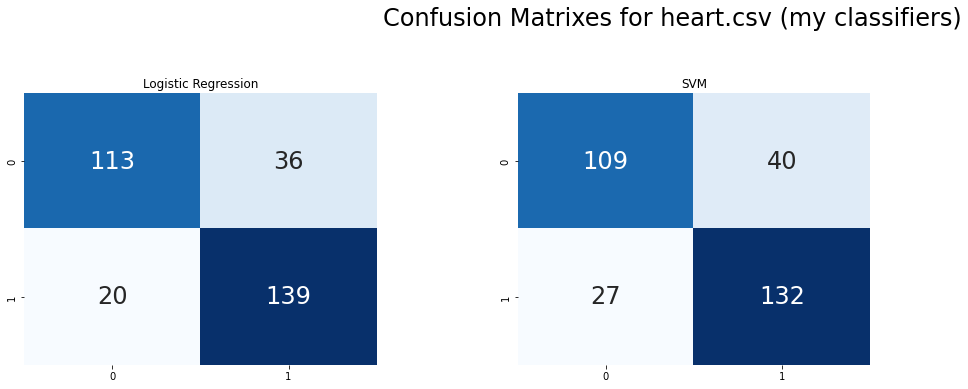

In [170]:
# Predictions
y_pred_my_lr_heart = Grid_myLR_heart.best_estimator_.predict(heart_test_X_scaled)
y_pred_my_svm_heart = Grid_mySVM_heart.best_estimator_.predict(heart_test_X_scaled)


# Confusion Matrices
# TP FP
# FN TN
cm_my_lr_heart = confusion_matrix(heart_test_y, y_pred_my_lr_heart)
cm_my_svm_heart = confusion_matrix(heart_test_y, y_pred_my_svm_heart)

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes for heart.csv (my classifiers)", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(cm_my_lr_heart,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("SVM")
sns.heatmap(cm_my_svm_heart,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

На датасете heart.csv:
- Реализованные модели показывают точность больше средней по кросс-валидации.
- Точность классификации увеличивается после подбора гиперпараметров.
- У реализованных моделей есть потенциал для улучшения, как в части подготовки данных, так и в части подбора параметров классификатора.
- По матрицам ошибок видно, что реализованные модели работают хуже (SVM) или на уровне (logistic regression) библиотечных реализаций.
- Из библиотечных реализаций наилучший результат классификации показали SVM и KNN.

#### Датасет titanic

In [179]:
from sklearn.metrics import confusion_matrix

# Predictions
y_pred_lr_titanic = Grid_LR_titanic.best_estimator_.predict(titanic_test_X_scaled)
y_pred_knn_titanic = Grid_KNN_titanic.best_estimator_.predict(titanic_test_X_scaled)
y_pred_svm_titanic = Grid_SVM_titanic.best_estimator_.predict(titanic_test_X_scaled)
y_pred_nb_titanic = Grid_NB_titanic.best_estimator_.predict(titanic_test_X_scaled)
y_pred_dt_titanic = Grid_DT_titanic.best_estimator_.predict(titanic_test_X_scaled)

# Confusion Matrices
# TP FP
# FN TN
cm_lr_titanic = confusion_matrix(titanic_test_y, y_pred_lr_titanic)
cm_knn_titanic = confusion_matrix(titanic_test_y, y_pred_knn_titanic)
cm_svm_titanic = confusion_matrix(titanic_test_y, y_pred_svm_titanic)
cm_nb_titanic = confusion_matrix(titanic_test_y, y_pred_nb_titanic)
cm_dt_titanic = confusion_matrix(titanic_test_y, y_pred_dt_titanic)

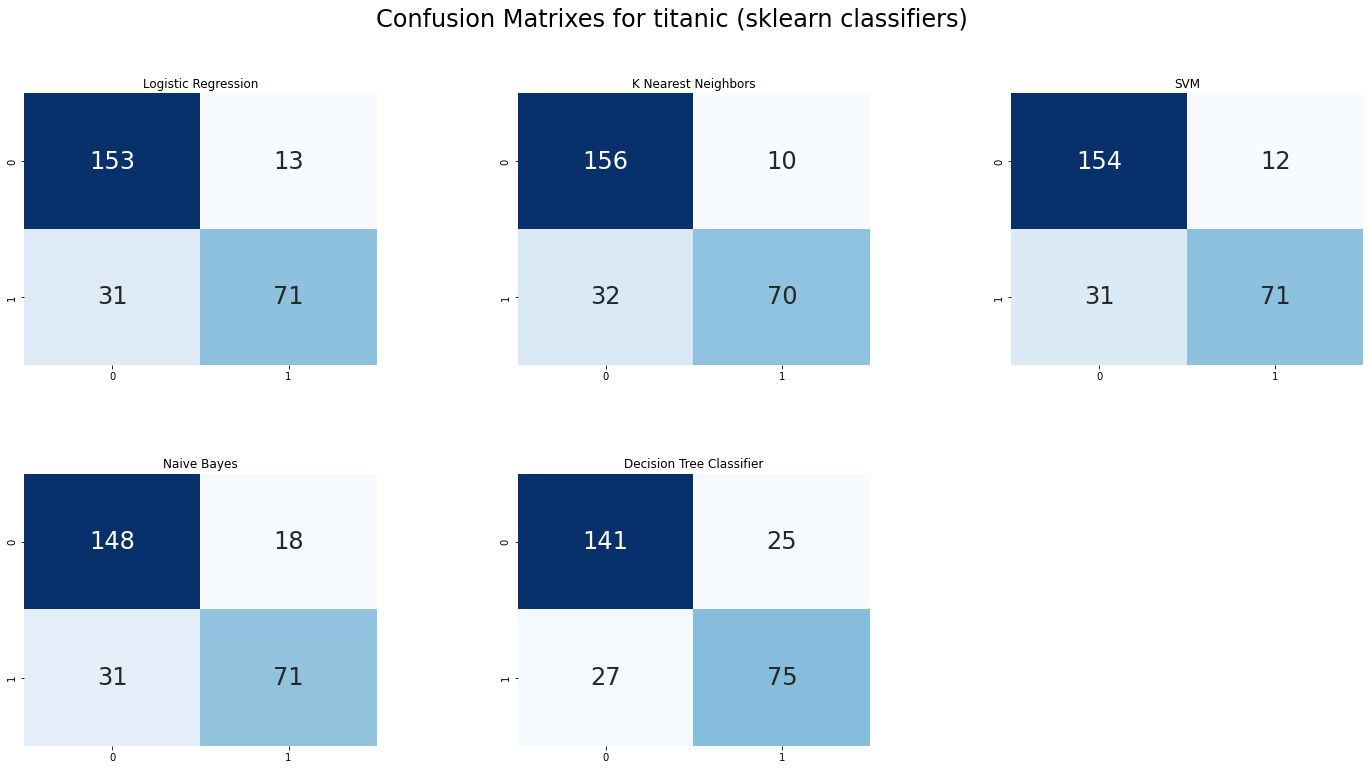

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes for titanic (sklearn classifiers)", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(cm_lr_titanic,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors")
sns.heatmap(cm_knn_titanic,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("SVM")
sns.heatmap(cm_svm_titanic,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes")
sns.heatmap(cm_nb_titanic,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier")
sns.heatmap(cm_dt_titanic,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

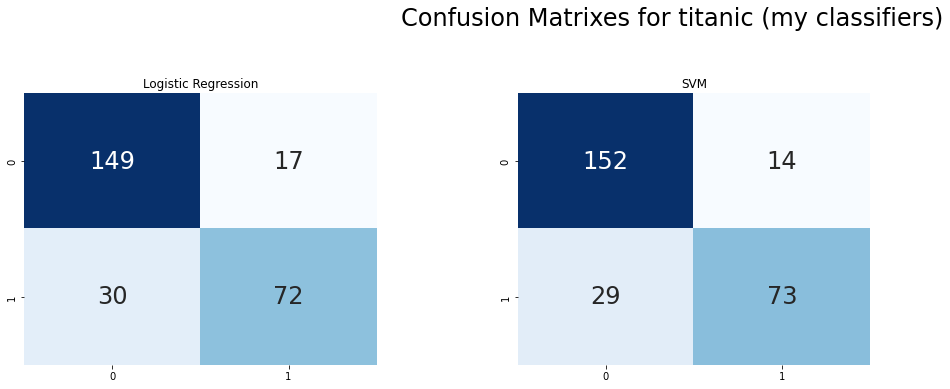

In [173]:
# Predictions
y_pred_my_lr_titanic = Grid_myLR_titanic.best_estimator_.predict(titanic_test_X_scaled)
y_pred_my_svm_titanic = Grid_mySVM_titanic.best_estimator_.predict(titanic_test_X_scaled)


# Confusion Matrices
# TP FP
# FN TN
cm_my_lr_titanic = confusion_matrix(titanic_test_y, y_pred_my_lr_titanic)
cm_my_svm_titanic = confusion_matrix(titanic_test_y, y_pred_my_svm_titanic)

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes for titanic (my classifiers)", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(cm_my_lr_titanic,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("SVM")
sns.heatmap(cm_my_svm_titanic,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

На датасете heart.csv:
- Реализованные модели показывают точность больше средней по кросс-валидации.
- Точность классификации увеличивается после подбора гиперпараметров.
- У реализованных моделей есть потенциал для улучшения, как в части подготовки данных, так и в части подбора параметров классификатора.
- По матрицам ошибок видно, что реализованные модели работают на уровне библиотечных реализаций.
- Из библиотечных реализаций наилучший результат классификации показали SVM и KNN.